# Exploration on the Gradient Changes in Stiffness Map

In [2]:
# ! pip install scipy 
import scipy.io
import numpy as np
import matplotlib.pyplot as plt 
import cv2
import os
import scipy.ndimage

In [3]:
# load the stiffness map from the correct path 
mat_path = "/home/smooi/Desktop/toast/data/Mu_Exp"

def list_files_in_dir(mat_path):
    # mat_file_names = []
    try:
        items = os.listdir(mat_path)
        return items
    except FileNotFoundError:
        return f"Error. The file is not found!"
    
stiffness_file = list_files_in_dir(mat_path)



In [4]:
# load the EA1026_Mu.mat to visualize the data 
# dict keys: dict_keys(['__header__', '__version__', '__globals__', 'Mu'])
file_name = "Cc100_Mu.mat"
full_path = os.path.join(mat_path, file_name)
stiff_data = scipy.io.loadmat(full_path)
mu = stiff_data["Mu"]

In [ ]:
# if "Mu" in stiff_data:
#     mu = stiff_data["Mu"]
#     print(f"The shape of the stiffness matrix is: {mu.shape}") # (160, 160, 80)
#     print("MuExp Data Type:", mu.dtype) # MuExp Data Type: float64
#     print("First 5 Values:\n", mu[:5, :5])
#     # we expected that in the edge of the Mu files 

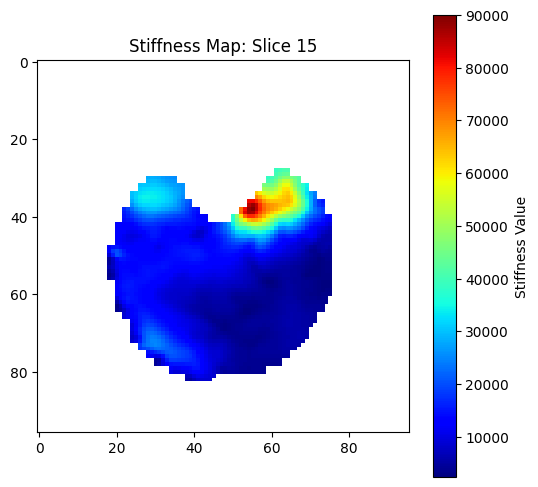

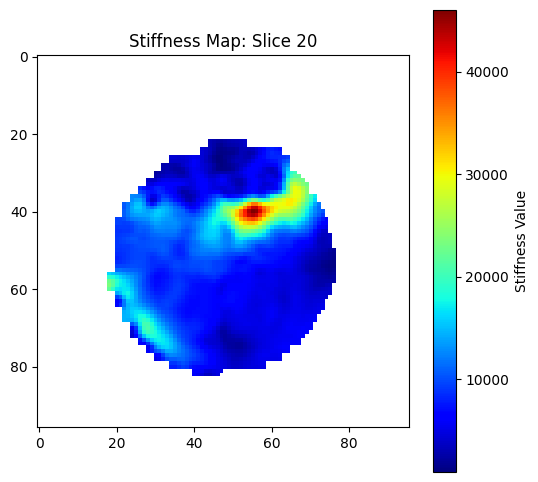

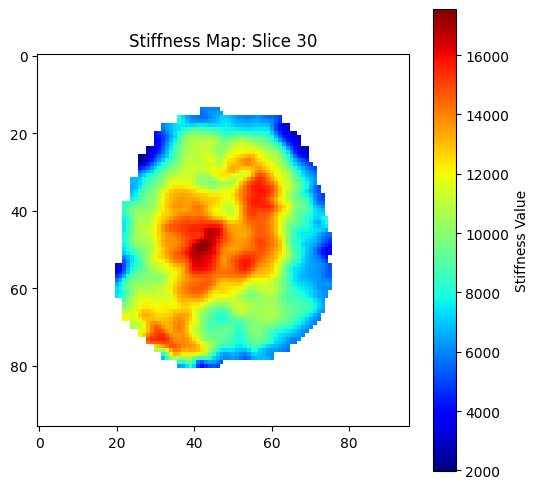

In [5]:
# visualize the stiffness map
slice_idx = 15, 20, 30

for value in slice_idx:
    plt.figure(figsize=(6,6))
    plt.imshow(mu[:, :, value], cmap='jet')
    plt.colorbar(label="Stiffness Value")
    plt.title(f"Stiffness Map: Slice {value}")
    plt.show()

In [ ]:
sharpening_kernel = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]])

# Compute the gradient map along x and y axis in 2D 
for value in slice_idx:
    selected_slice = mu[:, :, value]
    sharpened_slice = scipy.ndimage.convolve(selected_slice, sharpening_kernel, mode='reflect')
    
    grad_x = scipy.ndimage.sobel(sharpened_slice, axis=0)
    grad_y = scipy.ndimage.sobel(sharpened_slice, axis=1)
    
    grad_x_old = scipy.ndimage.sobel(selected_slice, axis=0)
    grad_y_old = scipy.ndimage.sobel(selected_slice, axis=1)
    
    sharp_grad_magnitude = np.sqrt(grad_x**2 + grad_y**2) 
    orig_grad_magnitude = np.sqrt(grad_x_old**2 + grad_y_old**2) 
    
    # Display original gradient magnitude
    plt.figure(figsize=(6,6))
    plt.imshow(orig_grad_magnitude, cmap='inferno')
    plt.colorbar(label="Gradient Magnitude")
    plt.title(f"Original Gradient Magnitude - Slice {value}")
    plt.show()
    
    # Display sharpened slice
    plt.figure(figsize=(6,6))
    plt.imshow(sharpened_slice, cmap='inferno')
    plt.colorbar(label="Sharpened Stiffness")
    plt.title(f"Sharpened Stiffness Map - Slice {value}")
    plt.show()

    # Display sharpened gradient magnitude
    plt.figure(figsize=(6,6))
    plt.imshow(sharp_grad_magnitude, cmap='inferno')
    plt.colorbar(label="Gradient Magnitude")
    plt.title(f"Sharpened Gradient Magnitude - Slice {value}")
    plt.show()
    


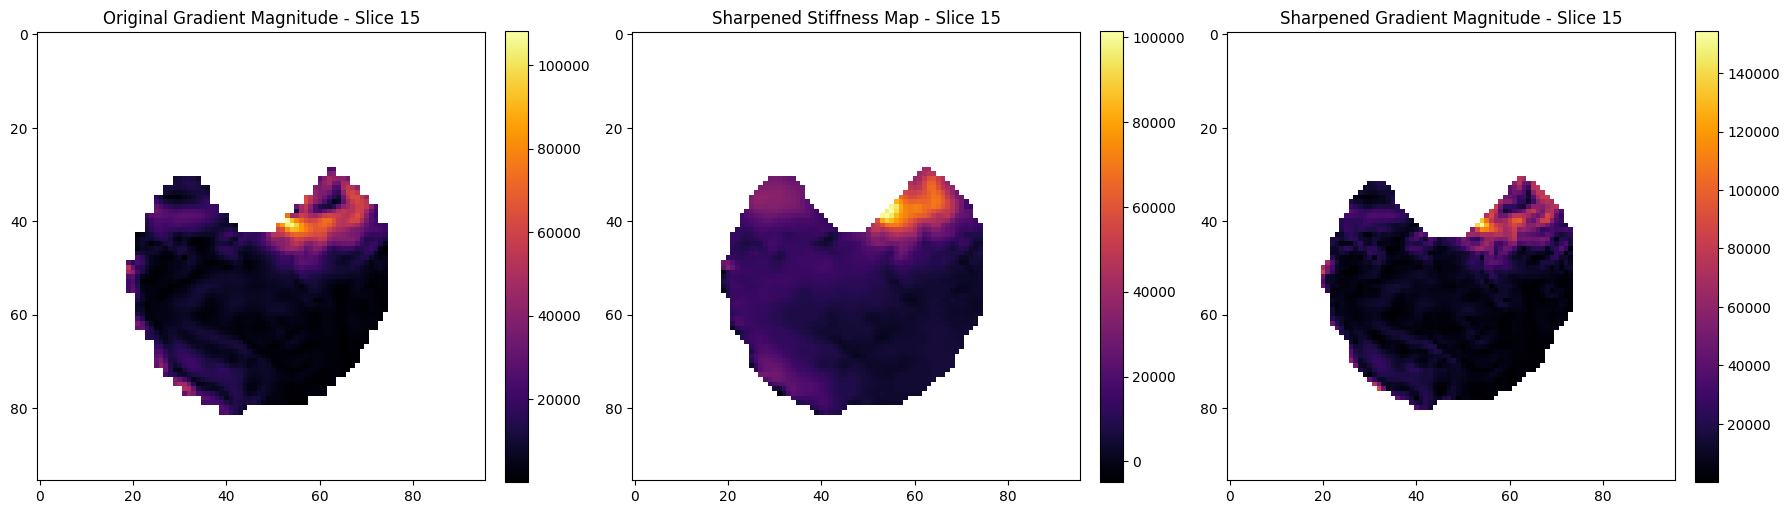

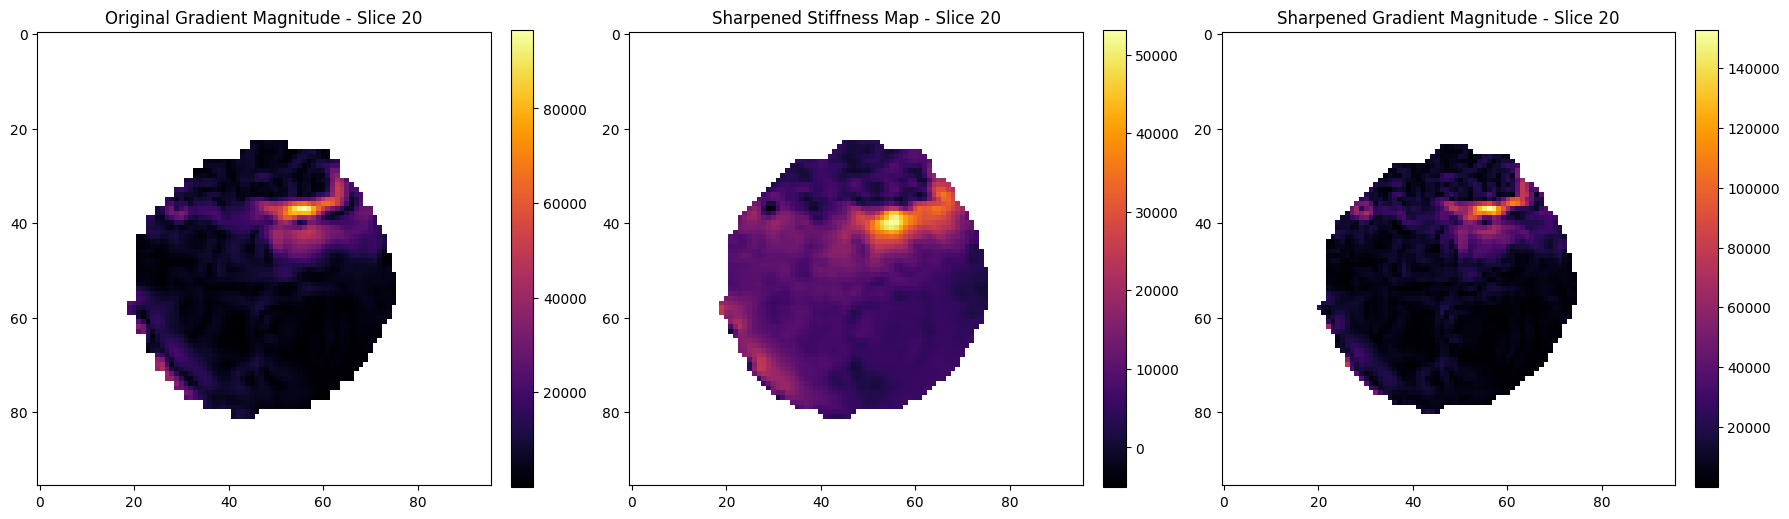

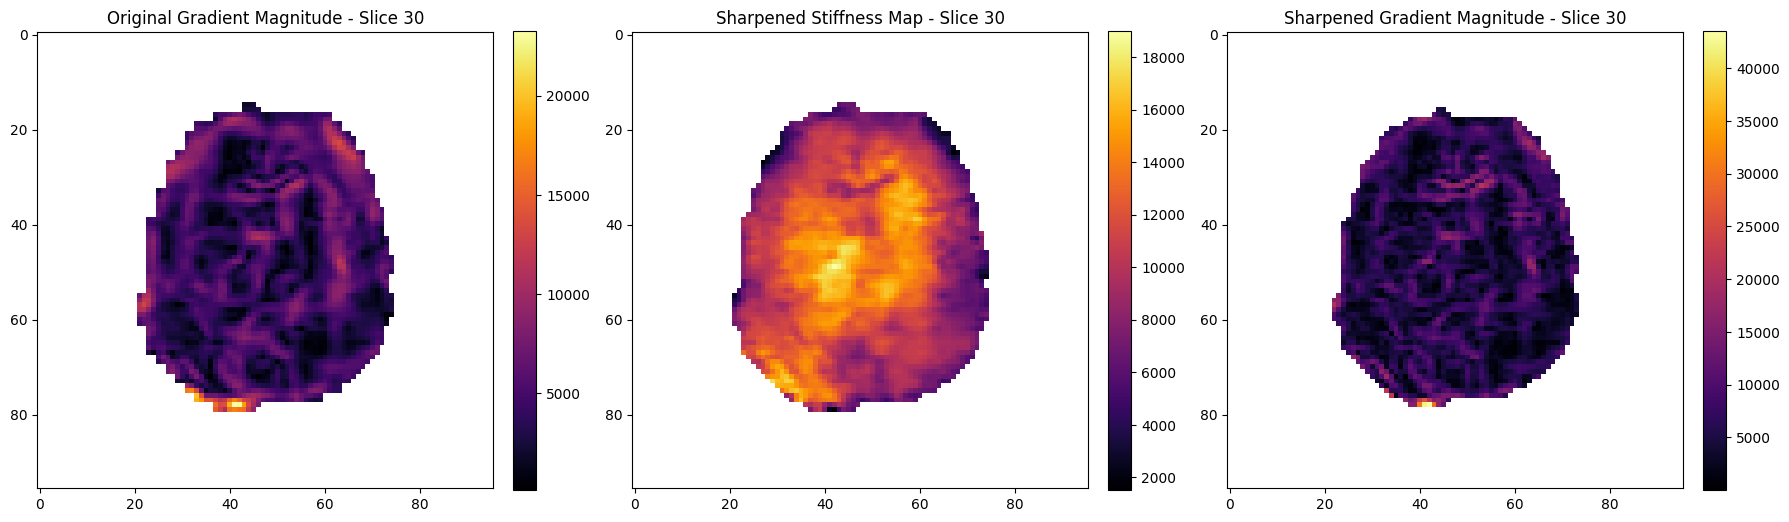

In [6]:
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt

sharpening_kernel = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]])

# Compute the gradient map along x and y axis in 2D
for value in slice_idx:
    selected_slice = mu[:, :, value]
    sharpened_slice = scipy.ndimage.convolve(selected_slice, sharpening_kernel, mode='reflect')
    
    grad_x = scipy.ndimage.sobel(sharpened_slice, axis=0)
    grad_y = scipy.ndimage.sobel(sharpened_slice, axis=1)
    
    grad_x_old = scipy.ndimage.sobel(selected_slice, axis=0)
    grad_y_old = scipy.ndimage.sobel(selected_slice, axis=1)
    
    sharp_grad_magnitude = np.sqrt(grad_x**2 + grad_y**2) 
    orig_grad_magnitude = np.sqrt(grad_x_old**2 + grad_y_old**2) 

    # Create a figure with subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Display original gradient magnitude
    im1 = axes[0].imshow(orig_grad_magnitude, cmap='inferno')
    axes[0].set_title(f"Original Gradient Magnitude - Slice {value}")
    fig.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04)

    # Display sharpened slice
    im2 = axes[1].imshow(sharpened_slice, cmap='inferno')
    axes[1].set_title(f"Sharpened Stiffness Map - Slice {value}")
    fig.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04)

    # Display sharpened gradient magnitude
    im3 = axes[2].imshow(sharp_grad_magnitude, cmap='inferno')
    axes[2].set_title(f"Sharpened Gradient Magnitude - Slice {value}")
    fig.colorbar(im3, ax=axes[2], fraction=0.046, pad=0.04)

    plt.tight_layout()
    plt.show()
